상관계수 (correlation coefficient)
- 두 변수 사이의 상관관계의 정도를 나타내는 수치
- 대표적으로 선형적인 상관관계를 보는 Pearson's correlation coefficient가 많이 사용됨

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 
$r = \rho_{X,Y} = {cov(X,Y)\over\sigma_x\sigma_y} = {\Sigma_i(x_i-\bar{x})(y_i-\bar{y})\over\sqrt{\Sigma_i(x_i-\bar{x})^2\Sigma_i(y_i-\bar{y})^2}}$

- 단위가 변함에 따라 Scale이 발생, ex) m → cm    
- scale에 관계없이 일정한 범위 안에서 값이 항상 나올수 있도록 공분산을 일정한 값을 갖는 분산으로 나누어 줌    

cov : 공분산(covariance), 두 변수 사이의 상관 정도, 변수 X,Y

- &nbsp; &nbsp; cov(X,Y) = $E[(X-\mu_X)(Y-\mu_Y)]$, <br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $\mu_X = E[X]$

$\sigma^2$ : 분산(variance), 변수 X만 존재

- &nbsp; &nbsp; $\sigma^2 = E[(X-\mu_X)^2] = E[X^2] - \mu^2_X$


상관계수(correlation coefficient)는 직선에 가까운 패턴일 수록 1 또는 -1에  근접한 상관계수 값을 보임, &nbsp;  $-1 \le \rho_{XY} \le 1$

If $\rho_{XY}$ = 0, 독립  
If $\rho_{XY}$ = 1, 100% 상관  
If $\rho_{XY}$ = -1, 역의 관계  
If -1 < $\rho_{XY}$ < 0, Negative correlate    
If 0 <  $\rho_{XY}$ < 1, Positive correlate    


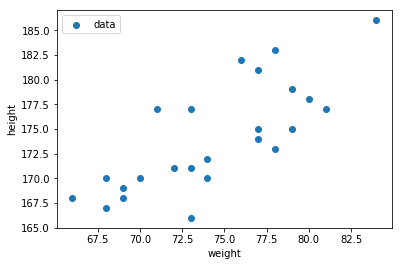

In [2]:
import pandas as pd

height = [170, 168, 177, 181 ,172, 171, 169, 175, 174, 178, 170, 167, 177, 182 ,173, 171, 170, 179, 175, 177, 186, 166, 183, 168]
weight = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69]

# DataFrame 만들기

body = pd.DataFrame(
    {'height': height, 'weight': weight}
)

# 산점도(scatter) 그리기

import matplotlib.pylab as plt

plt.scatter( body['weight'], body['height'], label = "data")

plt.legend(loc = "best")
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [10]:
import numpy as np

x = [170, 168, 177, 181 ,172, 171, 169, 175, 174, 178, 170, 167, 177, 182 ,173, 171, 170, 179, 175, 177, 186, 166, 183, 168]
y = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69]

# 피어슨의 상관계수
# 공분산을 기반으로 하기 때문에, 기본적으로 등간척도, 비율척도를 사용한 변수에만 적용 가능

np.corrcoef(x,y)

array([[1.        , 0.76766369],
       [0.76766369, 1.        ]])

In [11]:
# 두 변수의 상관관계만 확인하려면
np.corrcoef(x,y)[0,1]

0.7676636941791979

In [7]:
# 아래의 원리로 계산
cov = np.cov(x,y)         # 공분산
xsd = np.std(x, ddof=1)   # x의 표본표준편차
ysd = np.std(y, ddof=1)   # y의 표본표준편차

cov/(xsd*ysd)

array([[1.15991752, 0.76766369],
       [0.76766369, 0.86213026]])

In [13]:
import scipy.stats

# 스피어만 상관계수
# 서열척도를 사용한 변수가 포함되어 있거나, 등간/비율척도를 사용한 변수라 하더라도 두 변수간의 관계가 비선형적 일때

scipy.stats.spearmanr(x, y).correlation


0.7648602129134761

In [14]:
# 켙달의 tau
# 스피어만의 상관계수와 마찬가지로, 비선형적 관계이거나 서열 변수 일때
# 스피어만의 상관계수 보다 믿을만한 것으로 알려짐 (특히 표본이 작을때)

scipy.stats.kendalltau(x, y).correlation

0.5939891598681286